In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

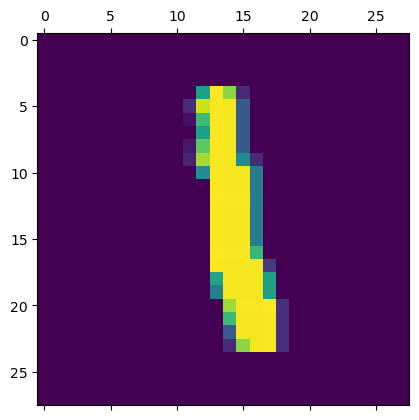

In [6]:
plt.matshow(x_train[6])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [10]:
cnn = models.Sequential([
    #cnn
    #layer1
    layers.Conv2D(filters=28, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    #layer2
    layers.Conv2D(filters=28, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    
    #dense network
    layers.Flatten(),
    layers.Dense(56, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [11]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8835 - loss: 0.3802
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9826 - loss: 0.0553
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9886 - loss: 0.0363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9911 - loss: 0.0281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9935 - loss: 0.0206
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9943 - loss: 0.0181
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9954 - loss: 0.0138
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9963 - loss: 0.0110
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9964 - loss: 0.0101
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9963 - loss: 0.0102


In [13]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0468


[0.03260513022542, 0.9908000230789185]

In [14]:
y_pred = cnn.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [15]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

